In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train =pd.read_csv('/content/train.csv')
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df_train.shape

(20800, 5)

In [4]:
df_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
data =df_train.copy()

In [6]:
print("Shape_before_na :",data.shape)
data.dropna(axis=0,inplace=True)
print("Shape_after_na_removed:",data.shape)

Shape_before_na : (20800, 5)
Shape_after_na_removed: (18285, 5)


In [7]:
data.reset_index(inplace=True)

In [8]:
#independent and dependent feature
#labels
X=data.iloc[:,:-1]
#target
y =data.iloc[:,-1]

In [9]:
X.head(5)

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [10]:
print('Feature_Independent_shape:',X.shape)
print('Traget_shape :',y.shape)

Feature_Independent_shape: (18285, 5)
Traget_shape : (18285,)


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [13]:
portstem =PorterStemmer()
corpus =[]
for i in range(0,len(X)):
  reviews =re.sub('^a-zA-Z',' ',X['text'][i])
  reviews =reviews.lower()
  reviews =reviews.split()
  reviews =[portstem.stem(word) for word in reviews if word not in stopwords.words('english')]
  reviews =' '.join(reviews)
  corpus.append(reviews)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [15]:
count_v =CountVectorizer(max_features=1000,ngram_range=(1,3))
X_tr=count_v.fit_transform(corpus).toarray()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
#train test split
X_train ,X_test ,y_train,y_test =train =train_test_split(X_tr,y,test_size=0.3,random_state=12)

In [18]:
from sklearn.naive_bayes import MultinomialNB
model =MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
y_pred = model.predict(X_test)

In [20]:
print("Accuracy_Score :",metrics.accuracy_score(y_test,y_pred))

Accuracy_Score : 0.8787823550856726


Confusion matrix, without normalization
[[2785  357]
 [ 308 2036]]
Normalized confusion matrix
[[0.8863781  0.1136219 ]
 [0.13139932 0.86860068]]


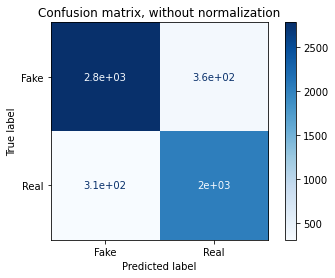

<Figure size 720x576 with 0 Axes>

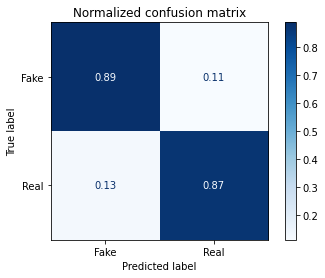

<Figure size 720x576 with 0 Axes>

In [21]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=['Fake','Real'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    plt.figure(figsize=(10,8))
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [22]:
model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [23]:
#hypertuning
for alpha in np.arange(0,1,0.05):
  sub=MultinomialNB(alpha=alpha)
  sub.fit(X_train,y_train)
  y_pred =sub.predict(X_test)
  score =metrics.accuracy_score(y_test,y_pred)
  print('Alpha :{} , Score :{}'.format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha :0.0 , Score :0.8787823550856726
Alpha :0.05 , Score :0.8787823550856726
Alpha :0.1 , Score :0.8787823550856726
Alpha :0.15000000000000002 , Score :0.8787823550856726
Alpha :0.2 , Score :0.8787823550856726
Alpha :0.25 , Score :0.8787823550856726
Alpha :0.30000000000000004 , Score :0.8787823550856726
Alpha :0.35000000000000003 , Score :0.8787823550856726
Alpha :0.4 , Score :0.8787823550856726
Alpha :0.45 , Score :0.8787823550856726
Alpha :0.5 , Score :0.8787823550856726
Alpha :0.55 , Score :0.8787823550856726
Alpha :0.6000000000000001 , Score :0.8787823550856726
Alpha :0.65 , Score :0.8787823550856726
Alpha :0.7000000000000001 , Score :0.8787823550856726
Alpha :0.75 , Score :0.8787823550856726
Alpha :0.8 , Score :0.8787823550856726
Alpha :0.8500000000000001 , Score :0.8787823550856726
Alpha :0.9 , Score :0.8787823550856726
Alpha :0.9500000000000001 , Score :0.8787823550856726


In [24]:
#Passive Aggresive classifier
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(n_iter_no_change=50)

In [25]:
model.fit(X_train,y_train)
y_pred =model.predict(X_test)

In [26]:
print("Accuracy_Score :",metrics.accuracy_score(y_test,y_pred))

Accuracy_Score : 0.913598250091141


Confusion matrix, without normalization
[[2871  271]
 [ 203 2141]]
Normalized confusion matrix
[[0.9137492 0.0862508]
 [0.0866041 0.9133959]]


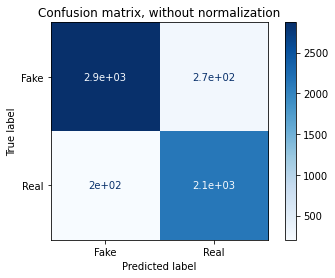

<Figure size 720x576 with 0 Axes>

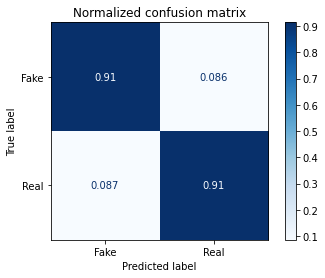

<Figure size 720x576 with 0 Axes>

In [27]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=['Fake','Real'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    plt.figure(figsize=(10,8))
    print(title)
    print(disp.confusion_matrix)
plt.show()

#***TfidfVectorizer***

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_v =TfidfVectorizer(ngram_range=(1,3),max_features=10000)
X_tr=tf_v.fit_transform(corpus).toarray()

In [30]:
#train test split
X_train ,X_test ,y_train,y_test =train =train_test_split(X_tr,y,test_size=0.3,random_state=12)

In [31]:
from sklearn.naive_bayes import MultinomialNB
model =MultinomialNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [32]:
print("Accuracy_Score :",metrics.accuracy_score(y_test,y_pred))

Accuracy_Score : 0.9201604083120671


Confusion matrix, without normalization
[[3010  132]
 [ 306 2038]]
Normalized confusion matrix
[[0.95798854 0.04201146]
 [0.13054608 0.86945392]]


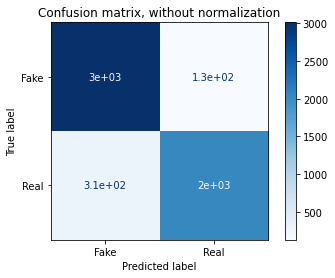

<Figure size 720x576 with 0 Axes>

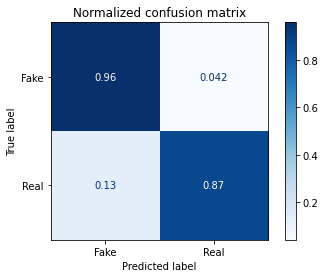

<Figure size 720x576 with 0 Axes>

In [33]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=['Fake','Real'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    plt.figure(figsize=(10,8))
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [35]:
#Passive Aggresive classifier
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(n_iter_no_change=50)
model.fit(X_train,y_train)
y_pred =model.predict(X_test)

In [36]:
print("Accuracy_Score :",metrics.accuracy_score(y_test,y_pred))

Accuracy_Score : 0.9622675902296756


Confusion matrix, without normalization
[[3032  110]
 [  97 2247]]
Normalized confusion matrix
[[0.96499045 0.03500955]
 [0.04138225 0.95861775]]


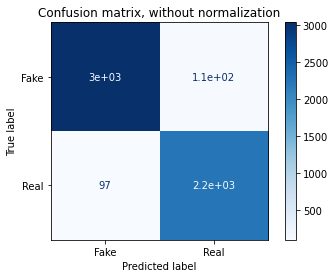

<Figure size 720x576 with 0 Axes>

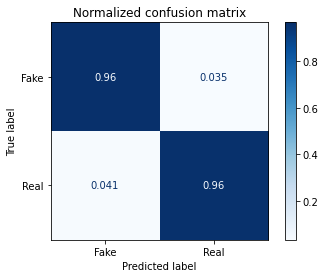

<Figure size 720x576 with 0 Axes>

In [37]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=['Fake','Real'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    plt.figure(figsize=(10,8))
    print(title)
    print(disp.confusion_matrix)
plt.show()